# Prosper Loan Data Exploration

## Introduction

This document explore a dataset containing information about 113, 937 loans and attributes that can influence interest rates.


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#load in the data set into padas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [4]:
# view the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
# View the first few rows
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
# Select the variables of interest
variables_of_interest = ['BorrowerAPR', 'BorrowerRate', 'LoanOriginalAmount', 'Term',
                         'ProsperScore', 'EmploymentStatus', 'EmploymentStatusDuration','IncomeRange', 
                         'StatedMonthlyIncome', 'DebtToIncomeRatio', 'IsBorrowerHomeowner', 
                         'CurrentlyInGroup', 'IncomeVerifiable']

# take a copy of the variables of interest
sel_df = df[variables_of_interest].copy()

In [7]:
# summary statistics of numeric variables
sel_df.describe()

,BorrowerAPR,BorrowerRate,LoanOriginalAmount,Term,ProsperScore,EmploymentStatusDuration,StatedMonthlyIncome,DebtToIncomeRatio
count,113912.000000,113937.000000,113937.00000,113937.000000,84853.000000,106312.000000,1.139370e+05,105383.000000
mean,0.218828,0.192764,8337.01385,40.830248,5.950067,96.071582,5.608026e+03,0.275947
std,0.080364,0.074818,6245.80058,10.436212,2.376501,94.480605,7.478497e+03,0.551759
min,0.006530,0.000000,1000.00000,12.000000,1.000000,0.000000,0.000000e+00,0.000000
25%,0.156290,0.134000,4000.00000,36.000000,4.000000,26.000000,3.200333e+03,0.140000
50%,0.209760,0.184000,6500.00000,36.000000,6.000000,67.000000,4.666667e+03,0.220000
75%,0.283810,0.250000,12000.00000,36.000000,8.000000,137.000000,6.825000e+03,0.320000
max,0.512290,0.497500,35000.00000,60.000000,11.000000,755.000000,1.750003e+06,10.010000


In [8]:
# Are there any missing values?
print(sel_df.isna().sum())
sel_df.isna().mean() * 100 

BorrowerAPR                    25
BorrowerRate                    0
LoanOriginalAmount              0
Term                            0
ProsperScore                29084
EmploymentStatus             2255
EmploymentStatusDuration     7625
IncomeRange                     0
StatedMonthlyIncome             0
DebtToIncomeRatio            8554
IsBorrowerHomeowner             0
CurrentlyInGroup                0
IncomeVerifiable                0
dtype: int64


BorrowerAPR                  0.021942
BorrowerRate                 0.000000
LoanOriginalAmount           0.000000
Term                         0.000000
ProsperScore                25.526387
EmploymentStatus             1.979164
EmploymentStatusDuration     6.692295
IncomeRange                  0.000000
StatedMonthlyIncome          0.000000
DebtToIncomeRatio            7.507658
IsBorrowerHomeowner          0.000000
CurrentlyInGroup             0.000000
IncomeVerifiable             0.000000
dtype: float64

In [9]:
# are there duplicates?
sel_df.duplicated().sum()

23

In [10]:
# No need to do something about the duplicates observed above
# Since they aren't any in the original dataset
df.duplicated().sum()

0

In [11]:
# replace missing values with averages for numeric columns
numeric_cols_with_missing_values = ['BorrowerAPR', 'ProsperScore', 'EmploymentStatusDuration']

for col in numeric_cols_with_missing_values:
    sel_df.loc[sel_df[col].isna(), col] = sel_df[col].mean()

In [12]:
# confirm it
sel_df[numeric_cols_with_missing_values].isna().sum()

BorrowerAPR                 0
ProsperScore                0
EmploymentStatusDuration    0
dtype: int64

In [13]:
# How about the missing values in employment status?
em_status_missing = sel_df.EmploymentStatus.isna()
sel_df[em_status_missing]

,BorrowerAPR,BorrowerRate,LoanOriginalAmount,Term,ProsperScore,EmploymentStatus,EmploymentStatusDuration,IncomeRange,StatedMonthlyIncome,DebtToIncomeRatio,IsBorrowerHomeowner,CurrentlyInGroup,IncomeVerifiable
39,0.152110,0.1450,10000,36,5.950067,NaN,96.071582,Not displayed,9583.333333,0.06000,False,False,True
92,0.082920,0.0755,2300,36,5.950067,NaN,96.071582,Not displayed,10833.333333,0.08000,True,True,True
146,0.099390,0.0925,4000,36,5.950067,NaN,96.071582,Not displayed,0.083333,0.07000,False,False,False
162,0.084830,0.0780,3000,36,5.950067,NaN,96.071582,Not displayed,7500.000000,0.13000,False,False,True
193,0.239370,0.2300,2000,36,5.950067,NaN,96.071582,Not displayed,2500.000000,0.20000,False,False,True
206,0.277670,0.2700,7500,36,5.950067,NaN,96.071582,Not displayed,9166.666667,0.16573,False,False,True
247,0.195820,0.1775,1000,36,5.950067,NaN,96.071582,Not displayed,2666.666667,0.12000,False,True,True
250,0.088570,0.0800,2000,36,5.950067,NaN,96.071582,Not displayed,6416.666667,0.10000,False,False,True
310,0.127240,0.1175,1800,36,5.950067,NaN,96.071582,Not displayed,3750.000000,0.16000,False,False,True
325,0.134530,0.1275,6500,36,5.950067,NaN,96.071582,Not displayed,5416.666667,0.10000,True,False,True


In [14]:
# The income range of these borrowers is not displayed
sel_df[em_status_missing].IncomeRange.value_counts()

Not displayed    2255
Name: IncomeRange, dtype: int64

In [15]:
# So these borrowers with missing employment status
sel_df[em_status_missing].StatedMonthlyIncome.describe()

count     2255.000000
mean      5164.803326
std       4324.170349
min          0.000000
25%       2708.333333
50%       4083.333333
75%       6250.000000
max      47916.666667
Name: StatedMonthlyIncome, dtype: float64

In [16]:
# The stated monthly income give us insight about the missing group
sel_df.groupby('EmploymentStatus').StatedMonthlyIncome.describe()

,count,mean,std,min,25%,50%,75%,max
EmploymentStatus,,,,,,,,
Employed,67322.0,6138.628212,5300.811683,0.000000,3749.875000,5204.875000,7500.000000,4.833333e+05
Full-time,26355.0,5043.148767,3776.669412,0.000000,2916.666667,4250.000000,6169.958334,1.083333e+05
Not available,5347.0,4554.904635,5647.943591,0.000000,2406.250000,3583.333333,5416.666667,2.083333e+05
Not employed,835.0,196.503693,1216.422473,0.000000,0.000000,0.000000,0.000000,2.083333e+04
Other,3806.0,3567.804191,2199.755664,0.083333,2083.333333,3166.666667,4555.416667,3.750000e+04
Part-time,1088.0,1640.256587,1287.900261,0.000000,833.333333,1379.250000,2104.166667,1.000000e+04
Retired,795.0,2987.477044,3333.533711,0.000000,1575.000000,2616.666667,3750.000000,8.333333e+04
Self-employed,6134.0,6338.474337,24766.444106,0.000000,2734.208333,4333.333333,7083.333333,1.750003e+06


In [17]:
# Replace the missing employment status with employed
sel_df.loc[em_status_missing, 'EmploymentStatus'] = 'Employed'

# While I'm at it :)
# Both full-time and part-time jobs fall under Employed Category
mask = (sel_df.EmploymentStatus == 'Part-time') | (sel_df.EmploymentStatus == 'Full-time')
sel_df.loc[mask, 'EmploymentStatus'] = 'Employed'

### What is the structure of your dataset?

The dataset consisted of 113,937 rows and 81 columns. The data types consisted mostly of numbers (integers and floats) and a few strings (object) and booleans. I'll be working with 13 columns.

### What is/are the main feature(s) of interest in your dataset?

I'm mainly interested in the interest rate of the loans (`BorrowerRate`) and factors that influence a loan's interest rate. On the side, I may also look at borrower's annual percentage rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect features such as term (duration of loan), loan amount, income, employment, prosper score (risk score), etc., to affect interest rates.

In [18]:
# some setup and functions
# the base color for all plots
color = sb.color_palette()[0]
figsize = (16,6)
figsize_sm = (12,4)

# helper functions
def barchart(df, title=None, xlab=None, ylab=None, **kwargs):
    """
      Args:
        df    - A pandas dataframe containing the column to plot
        title - The title of the plot
        xlab  - The x axis label
        ylab  - The y axis label
        kwargs - arguments forwarded to seaborn's countplot
      Return:
        None
    """
    sb.countplot(data=df, color=color, **kwargs);
    if title: plt.title(title)
    if ylab:  plt.ylabel(ylab)
    if xlab:  plt.xlabel(xlab);
    

def histogram(x, *, bins=10, step = 1, title=None, xlab=None, **kwargs):
    """
      Args:
        x     - The numeric variable to plot
        bins  - The number of bins
        step  - A value to add to the bins
        title - The title of the plot
        xlab  - The x axis label
        kwargs - arguments forwarded to plt's hist method
      Return:
        None
    """
    min_x, max_x = x.aggregate(['min', 'max'])
    bins = np.arange(min_x, max_x + step, bins + step)
    plt.hist(x, bins=bins, **kwargs)
    plt.ylabel('Frequency')
    if title: plt.title(title)
    if xlab:  plt.xlabel(xlab)


        
def bivar_plots_for_rates(df, x, method=sb.regplot, title='Scatterplot', rotation=0, **kwargs):
    """
      Args:
        df - The pandas dataframe containing the variables to plot
      Return:
        x        - The x axis variable
        method   - The plot method. Defaults to seaborn's regplot
        title    - Kind of plot
        rotation - Useful for boxplots and violins plots
    """
    rates = ['BorrowerRate', 'BorrowerAPR']
    ylabs = ['Borrower Rate', 'Borrower APR']
    titles = tuple(map(lambda s: f'{title} of {s} by {var_name_to_label(x)}', ylabs))
    plt.figure(figsize=(16,6))
    
    for i, rate in enumerate(rates):
        plt.subplot(1, len(rates), i + 1)
        method(data=df, x=x, y=rate, color=color, **kwargs)
        plt.xlabel(var_name_to_label(x))
        plt.ylabel(ylabs[i])
        plt.title(titles[i])
        plt.xticks(rotation=rotation)
        

def bivar_boxplot_for_rates(df, x, rotation=0, **kwargs):
    """
      Args:
        df - The pandas dataframe containing the variables to plot
      Return:
        x        - The x axis variable
        rotation - Rotate the xtick by this value
    """
    bivar_plots_for_rates(df, x, method=sb.boxplot, title='Boxplot', rotation=rotation, **kwargs)
    

def corr_mat(num_cols, df=sel_df, **kwargs):
    """Show a correlation matrix of the numerical columns"""
    plt.figure(figsize=(8, 5))
    sb.heatmap(df[num_cols].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0, **kwargs)
    plt.show()



def var_name_to_label(var_name):
    """
      Args:
        var_name - variable name in pascal case e.g 'StatedMonthlyIncome'
      Return:
        label    - variable name as a label e.g. 'Stated Monthly Income'
    """
    
    import re
    
    # split by uppercase and capture (()) to keep the uppercase letters
    result = re.split(r'([A-Z])', var_name)
    
    # remove empty strings
    result = list(filter(lambda x: x, result))
    
    # combine two elements at a time
    label = [ ''.join(result[i:i+2]) for i in range(0, len(result), 2)]
    label = ' '.join(label)
    
    return label

In [19]:
# Testing 123
var_name_to_label('StatedMonthlyIncome'), var_name_to_label('IncomeRange')

('Stated Monthly Income', 'Income Range')

## Univariate Exploration

I'll start by exploring the variable of interest. What is the distribution of interest rates?

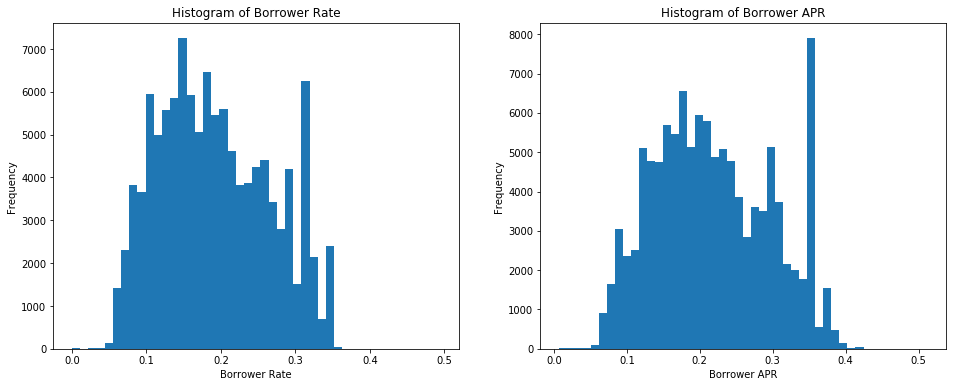

In [20]:
# create a histogram of interest rate (borrower rate) and annual percentage rate
rates = ['BorrowerRate', 'BorrowerAPR']
xlabs = ['Borrower Rate', 'Borrower APR']
titles = tuple(map(lambda s: f'Histogram of {s}', xlabs))

plt.figure(figsize=figsize)

for i, rate in enumerate(rates):
    plt.subplot(1, len(rates), i + 1)
    histogram(sel_df[rate], bins=0.01, step=.001, xlab=xlabs[i], title=titles[i])

The Borrower's rates takes a fairly symmetric shape and comprised mostly of values between 0.1 and 0.3. The highest point is around the 0.15 mark. The borrower's annual percentage rate (APR) is mainly distributed around 0.1 to 2.5 with a large spike observed at about 3.5 mark. 

Next, I look at the first feature of interest,Term which is length of loan expressed in months.

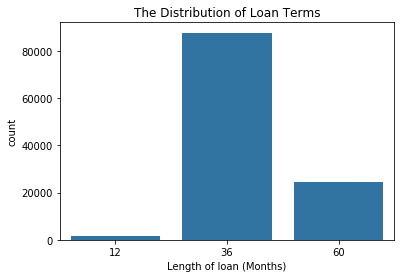

In [21]:
barchart(sel_df, x='Term', xlab='Length of loan (Months)', title='The Distribution of Loan Terms')

Most of the loans were mid-term loans (36 months or 3 years). This was followed by long-term loans (60 months or 5 years) while the least frequent was short-term loans (12 months or 1 year).

Next, let's the distribution of the original loan amount.

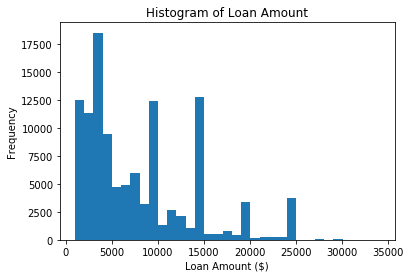

In [22]:
title='Histogram of Loan Amount'
histogram(sel_df.LoanOriginalAmount, bins=1000, title=title, xlab='Loan Amount ($)')

count    113937.000000
mean          3.795130
std           0.345610
min           3.000000
25%           3.602060
50%           3.812913
75%           4.079181
max           4.544068
Name: LogLoanOriginalAmount, dtype: float64


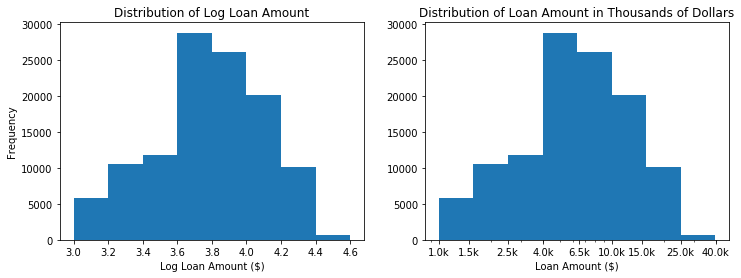

In [23]:
# take the log10 of loan amount
# print(np.log10(sel_df.LoanOriginalAmount.describe()))
sel_df['LogLoanOriginalAmount'] = np.log10(sel_df.LoanOriginalAmount)

# stats of log loan amount
print(sel_df.LogLoanOriginalAmount.describe())

plt.figure(figsize=figsize_sm)

# plot histogram 1
plt.subplot(1, 2, 1)
histogram(sel_df.LogLoanOriginalAmount, bins=0, step=.2, 
          xlab='Log Loan Amount ($)', title='Distribution of Log Loan Amount')

# The ticks for bins between [0 - maximum loan amount]
bins = 10 ** np.arange(3, 4.5+0.2, 0.2)

# the x-ticks to apply
ticks = [1000, 1500, 2500, 4000, 6500, 10000, 15000, 25000, 40000]
# ticks to labels
labels = [f'{t/1000}k' for t in ticks]

# Plot a well-labelled histogram
plt.subplot(1, 2, 2)
plt.hist(data=sel_df, x='LoanOriginalAmount', bins=bins);
plt.xscale('log')
plt.xticks(ticks, labels);
plt.xlabel('Loan Amount ($)')
plt.title('Distribution of Loan Amount in Thousands of Dollars');

Most of loan amount were below 10,000 dollars. The distribution of loan amount is right-skewed due to outliers on the right. 
The log of loan amount gives a more symmetrical distribution.

Next, let's see employment status of the Borrowers.

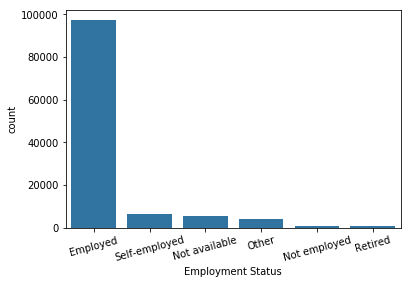

In [24]:
# bar chart of employment status
order = sel_df.EmploymentStatus.value_counts().index
barchart(sel_df, x='EmploymentStatus', xlab='Employment Status', order=order)
plt.xticks(rotation=15);

While the employment status of some individuals were not available, most of the individuals were employed. Also, there are relatively low counts of unemployed and retired individuals.

Next, I look at the employment status duration.

In [25]:
# descriptive statistics of employment duration
sel_df.EmploymentStatusDuration.describe()

count    113937.000000
mean         96.071582
std          91.264375
min           0.000000
25%          28.000000
50%          74.000000
75%         130.000000
max         755.000000
Name: EmploymentStatusDuration, dtype: float64

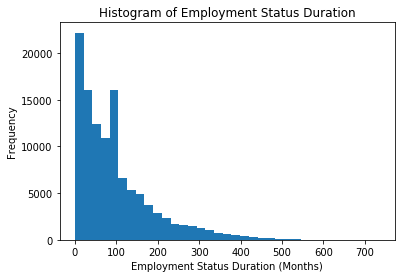

In [26]:
# histogram of employment status duration
xlab = 'Employment Status Duration'
title = f'Histogram of {xlab}'
histogram(sel_df.EmploymentStatusDuration, bins=20, title=title, xlab=f'{xlab} (Months)')

The distribution of employment status duration is right-skewed. However, most of the values lied between 0 and 200 months.

Next, we inspect the income range, the stated income and the risk score associated with each loan.

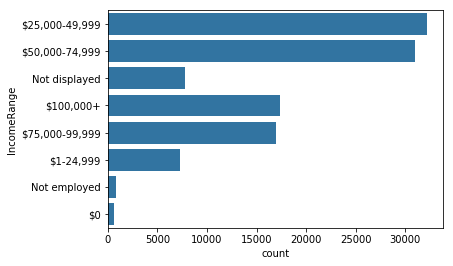

In [27]:
# plot income range
barchart(sel_df, y='IncomeRange')

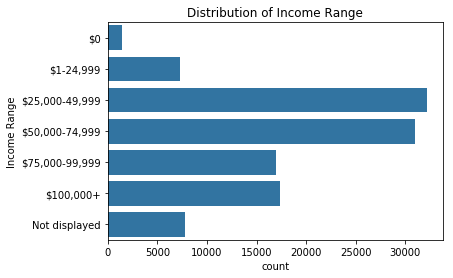

In [28]:
# data cleaning
# change the income range 'Not employed' to $0
sel_df.loc[sel_df.IncomeRange == 'Not employed', 'IncomeRange'] = '$0'

income_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 
         'Not displayed']

# plot income range
barchart(sel_df, y='IncomeRange', title='Distribution of Income Range', ylab='Income Range', order=income_order)

Most of the Borrowers earned between \\$25k - \\$50k followed by those who earned between $50k - 75k. The income range of some Borrowers was not displayed while very few Borrowers had no income.

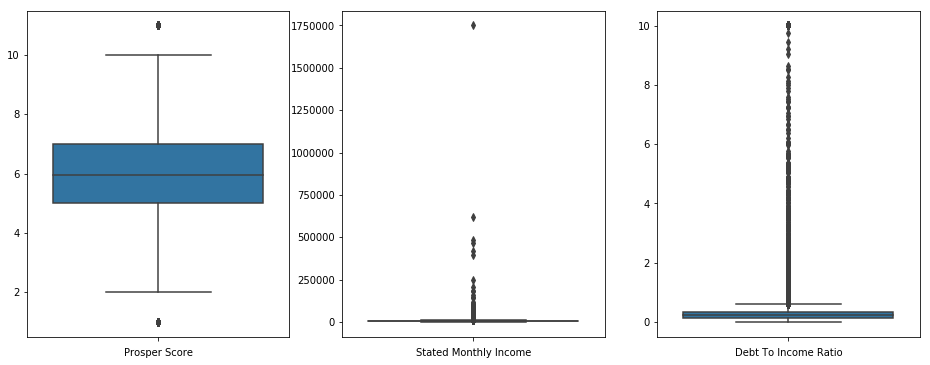

In [29]:
# boxplot of risk, monthly income and debt-income ratio
plt.figure(figsize=figsize)
ss = ['ProsperScore', 'StatedMonthlyIncome', 'DebtToIncomeRatio']
for i, v in enumerate(ss):
    plt.subplot(1, len(ss), i + 1)
    sb.boxplot(data=sel_df, y=v)
    plt.xlabel(var_name_to_label(v))
    plt.ylabel('')

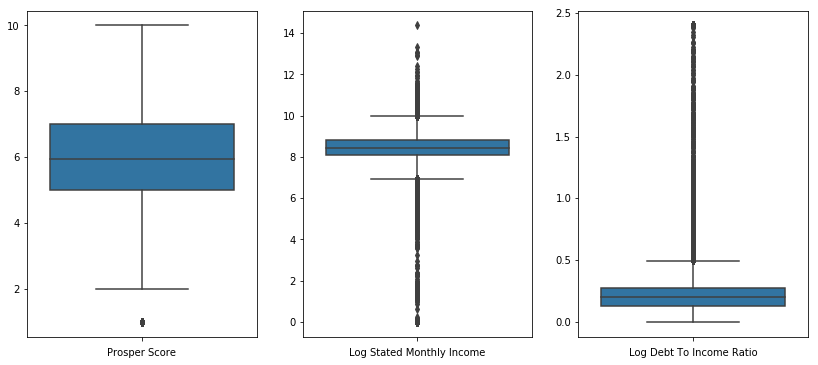

In [30]:
# data cleaning
# The prosper score ranges from 1 - 10 according to the data dictionary.
# The boxplot above indicated scores above 10 were present
# replace values above 10 with 10
sel_df.loc[sel_df.ProsperScore > 10, 'ProsperScore'] = 10


# take the log of stated monthly income and debt to income ratio
sel_df['LogStatedMonthlyIncome'] = np.log1p(sel_df.StatedMonthlyIncome)
sel_df['LogDebtToIncomeRatio'] = np.log1p(sel_df.DebtToIncomeRatio)

ss = ['ProsperScore', 'LogStatedMonthlyIncome', 'LogDebtToIncomeRatio']

# sel_df[ss].describe()

plt.figure(figsize=(14,6))

for i, v in enumerate(ss):
    plt.subplot(1, len(ss), i + 1)
    sb.boxplot(data=sel_df, y=v)
    plt.xlabel(var_name_to_label(v))
    plt.ylabel('')

The median risk score (prosper score) of the loans was 6. The stated monthly income and consequently the debt-income ratio had lots of outliers. I took the log1p of stated monthly income and debt-income ratio.

Finally, I look at whether the income of the borrower is verifiable, whether the borrower is a homeowner or whether the person belongs to a group.

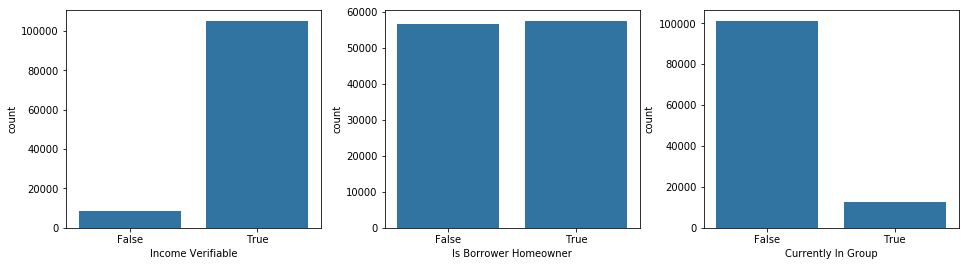

In [31]:
# plot income verified, home ownership and group membership
other_variables = ['IncomeVerifiable', 'IsBorrowerHomeowner', 'CurrentlyInGroup']

plt.figure(figsize=(16, 4))
# set the spacing between subplots
plt.subplots_adjust(wspace=0.25)

for i, v in enumerate(other_variables):
    plt.subplot(1, len(other_variables), i + 1)
    barchart(sel_df, x=v)
    plt.xlabel(var_name_to_label(v))

Most of the Borrowers had verifiable income. Those who owned homes were slightly higher than those who didn't. While most of the Borrowers were not in any group.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The Borrower's rates are comprised mostly of values between 0.1 and 0.3. The highest point was around the 0.15 mark. There was a dip at the 0.3 mark and a sudden spike at the 3.1 mark. The borrower's annual percentage rate (APR) was mainly distributed around 0.1 to 2.5 with a large spike observed at about 3.5 mark. No transformation was necessary as the interest rate did not appear to be skewed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were missing values in 3 numeric columns and 1 categorical column (EmploymentStatus). I replaced the missing values in the numeric columns with their corresponding averages. Then, I replaced the missing rows in the categorical column with its mode. This step was performed to clean the dataset. 

The original loan amount had lots of extremely high values so the distribution was right-skewed. I took `log10` of the loan amount to get a more symmetrical distribution without outliers.

Employment status had 3 levels that meaned the same thing (Employed, Full-time and Part-time). I merged them into a single level, Employed, to keep the employment status variable compact.

Similar, I cleaned up the income range variable by merging `Not Employed` with `$0`.

The stated month income and debt-income ratio had lots of outliers so I performed a `log1p` transformation to get a better distribution of the data.

The Prosper score ranges from 1-10, with 10 being the best, or lowest risk score. In the dataset, the Prosper score had a max value of 11 instead of 10. I replaced all occurrence of 11 with 10.

## Bivariate Exploration


I'll start this section by exploring the association between interest rates and loan term.

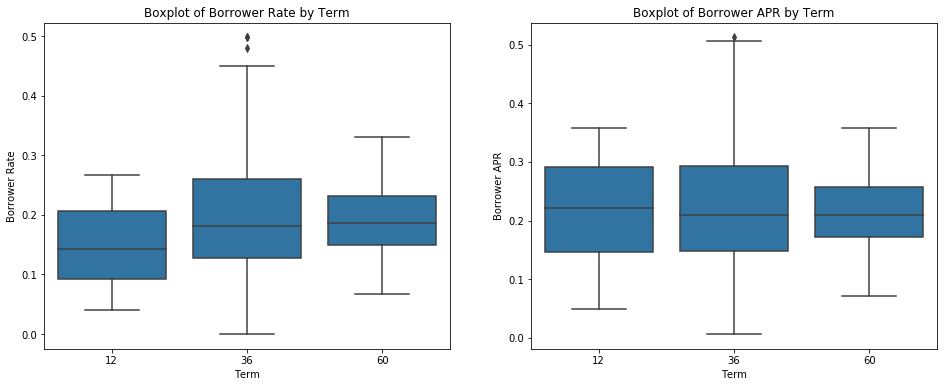

In [32]:
bivar_boxplot_for_rates(sel_df, 'Term')

Borrower interest rate was lowest for short term loans (12 months) while Borrower annual percentage rates (APR) was highest for short term loans and equal for mid-term and long-term loans.

Next, I'll explore the relationship between loan amount and interest rates.

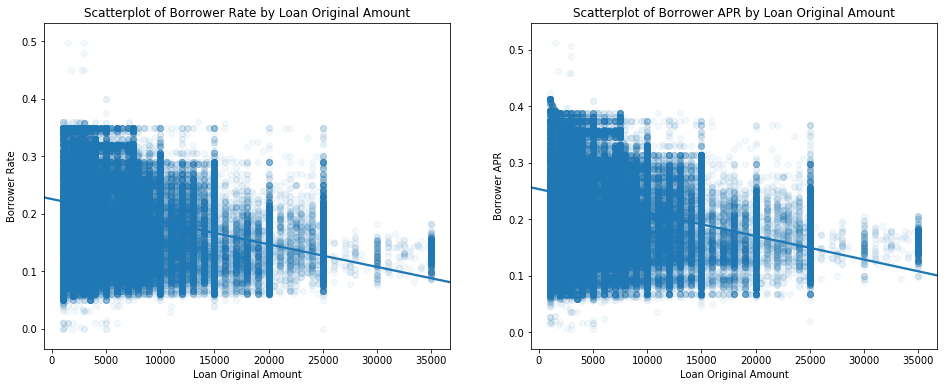

In [33]:
# scatterplot of interest rates vs loan amount
bivar_plots_for_rates(sel_df, 'LoanOriginalAmount', x_jitter=0.3, scatter_kws={'alpha': 1/20})

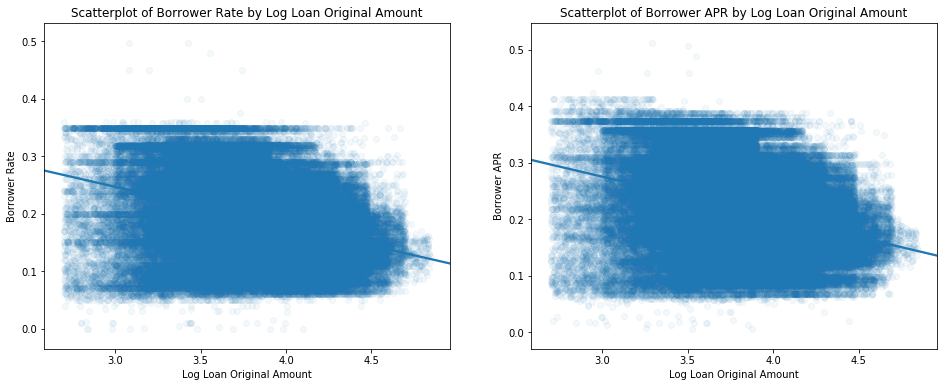

In [34]:
# scatterplot of interest rates vs. log10 of original loan amount
bivar_plots_for_rates(sel_df, 'LogLoanOriginalAmount', x_jitter=0.3, scatter_kws={'alpha': 1/20})

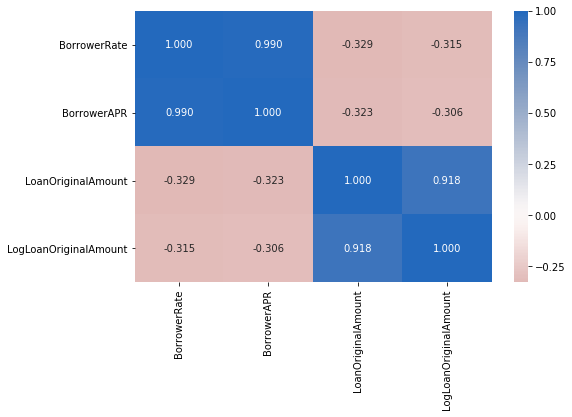

In [35]:
# what is the strength of the relationship between interest rates and loan amount?
corr_mat([*rates, 'LoanOriginalAmount', 'LogLoanOriginalAmount'])

We can observe a negative correlation between interest rates and loan amount. This implies that as the loan amount increases, the interest rate decreases.

Next, I'll explore the association between interest rates and employment status

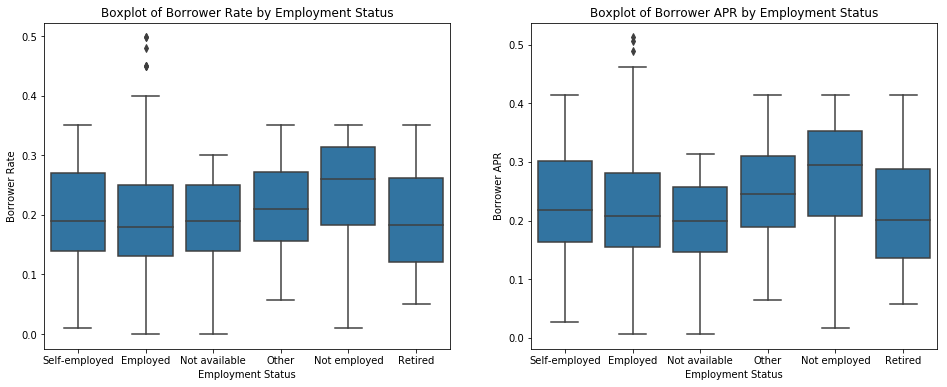

In [36]:
bivar_boxplot_for_rates(sel_df, 'EmploymentStatus')

Surprisingly, interest rates were higher for those who were unemployed. Those who were employed or retired got relatively lower interest rates.

What does the stated monthly income for each employment status look like? 

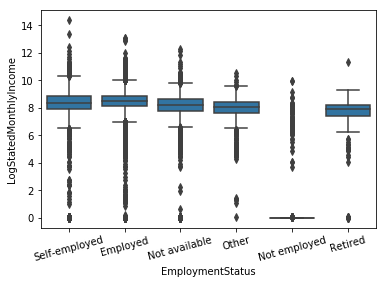

In [37]:
sb.boxplot(data=sel_df, x='EmploymentStatus', y='LogStatedMonthlyIncome', color=color)
plt.xticks(rotation=15);

As expected, those unemployed had the lowest stated monthly income on average. However, there were outliers all over the place.


How about the income range and interest rates?

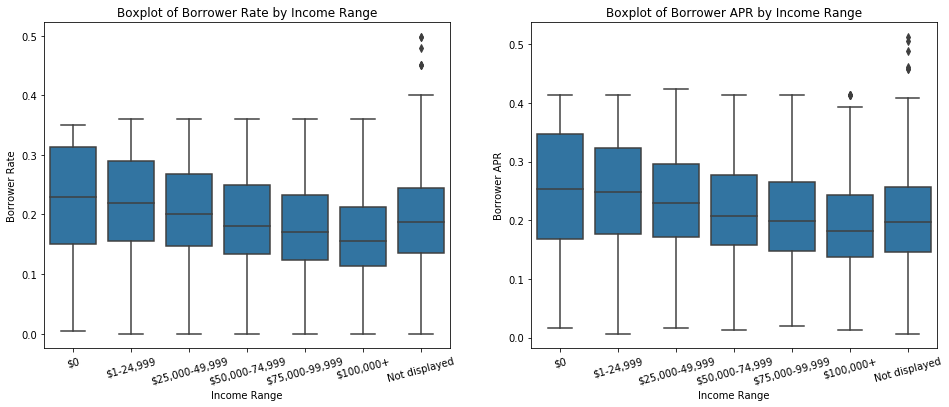

In [38]:
bivar_boxplot_for_rates(sel_df, 'IncomeRange', rotation=15, order=income_order)

Interest rate and annual percentage rate are highest for those who earned nothing (\\$0) and between \\$1 - \\$25k. This is similar to the above finding that those unemployed had highest interest rates.

I now know that interest rates are higher for low to low income earners. What would a scatterplot between interest rates and stated monthly income look like?

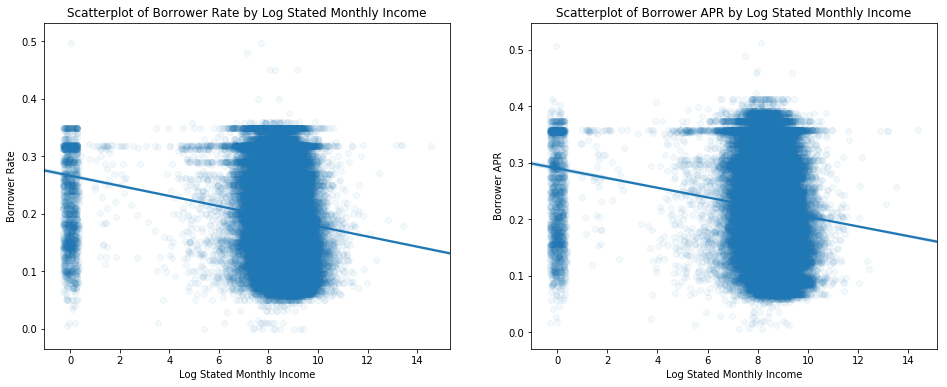

In [39]:
bivar_plots_for_rates(sel_df, 'LogStatedMonthlyIncome', x_jitter=0.3, scatter_kws={'alpha': 1/20})

There are two clusters pooled around zero (0) and between 7 - 10 on the x axis. Though the regression line showed a downward trend, it is questionable.

Next, I look at our the prosper score or risk influence interest rates.

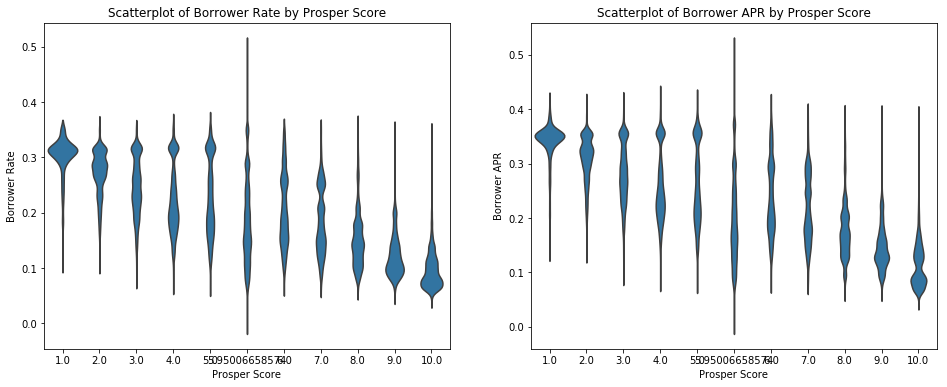

In [40]:
# The lowest risk is 10 while the highest risk is 1
# Therefore, interpret the plot in the reverse order 
bivar_plots_for_rates(sel_df, 'ProsperScore', method=sb.violinplot, inner=None)

There is a downward trend between risk and interest rates. How strong is it?

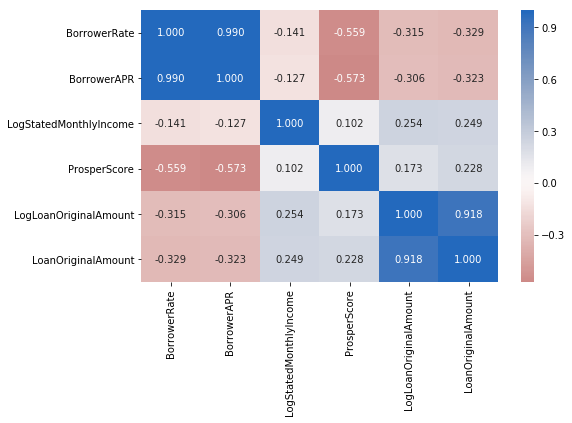

In [41]:
# How strong is the correlation between interest rates and prosper score and stated monthly income.
# I added loan amount to observe the interaction between loan amount and risk 
corr_mat([*rates, 'LogStatedMonthlyIncome', 'ProsperScore', 'LogLoanOriginalAmount', 'LoanOriginalAmount'])

The violinplot and correlation matrix both show that as the prosper risk score increases (indicator of lowering risk score), the interest rates decreases. **This is to say that loans with lower risks had lower interest rates.**


Lastly, how does income verification, home ownership and group participation affect interest rates?

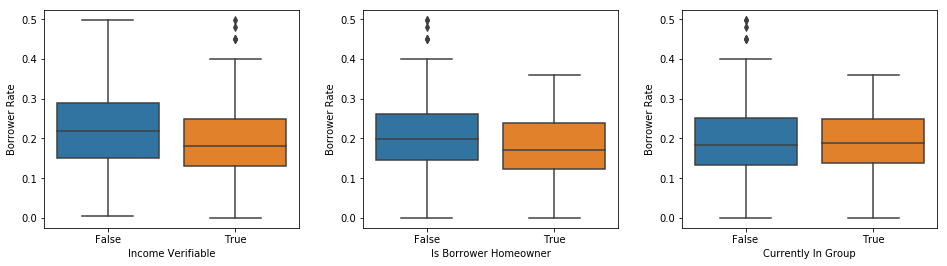

In [42]:
plt.figure(figsize=(16, 4))
# set the spacing between subplots
plt.subplots_adjust(wspace=0.25)

for i, v in enumerate(other_variables):
    plt.subplot(1, len(other_variables), i + 1)
    sb.boxplot(data=sel_df, x=v, y='BorrowerRate')
    plt.xlabel(var_name_to_label(v))
    plt.ylabel(var_name_to_label('BorrowerRate'))

Lower interest rates appeared to be associated with home ownership and verified income. Being part of a group did not appear to influence interest rates. 

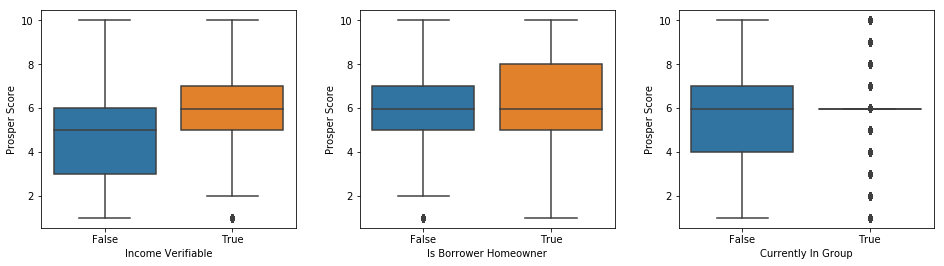

In [43]:
plt.figure(figsize=(16, 4))
# set the spacing between subplots
plt.subplots_adjust(wspace=0.25)

for i, v in enumerate(other_variables):
    plt.subplot(1, len(other_variables), i + 1)
    sb.boxplot(data=sel_df, x=v, y='ProsperScore')
    plt.xlabel(var_name_to_label(v))
    plt.ylabel(var_name_to_label('ProsperScore'))

Borrowers with verified income and Borrowers in groups had a higher prosper score (lower risk) relative to their counterparts.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Interest rate was lowest for short term loans (12 months) while annual percentage rates (APR) was highest for short term loans. Also, an increase in loan amount seemed to be associated with a decrease in interest rates.

Interest rates were highest for those who earned nothing to low incomes, and for those whose did not have homes or verified income.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Borrowers with verified income had a higher prosper score (lower risk) relative to their counterparts. Group membership and home ownership did not seem to affect loan risk. Higher loan amounts appeared to be associated with lower risk (higher prosper scores).

## Multivariate Exploration

Let's start this section with the relationship between interest rates and loan amounts based on loan term. 

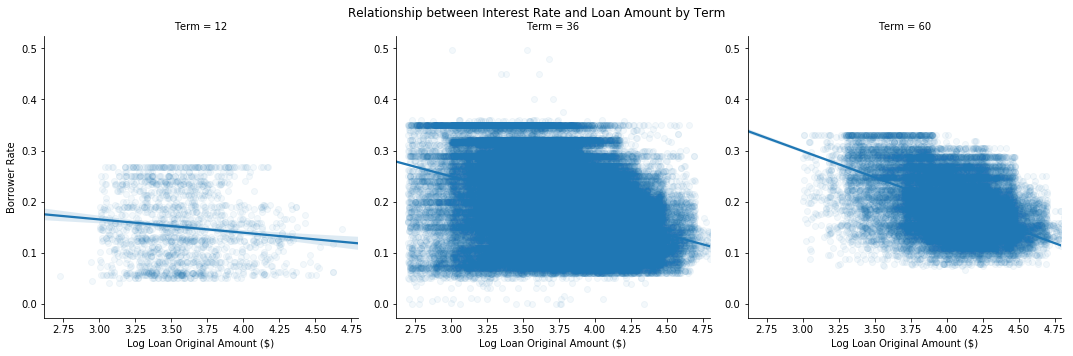

In [44]:
g = sb.FacetGrid(data = sel_df, col = 'Term', size = 5)
g.map(sb.regplot,  'LogLoanOriginalAmount', 'BorrowerRate', x_jitter=0.3, scatter_kws={'alpha': 1/20});
g.set_xlabels('Log Loan Original Amount ($)')
g.set_ylabels('Borrower Rate')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Interest Rate and Loan Amount by Term');

In [45]:
# The correlation coefficients
sel_df.groupby('Term')[['BorrowerRate', 'LogLoanOriginalAmount']].corr()

BorrowerRate  LogLoanOriginalAmount
Term                                                           
12   BorrowerRate               1.000000              -0.102349
     LogLoanOriginalAmount     -0.102349               1.000000
36   BorrowerRate               1.000000              -0.327309
     LogLoanOriginalAmount     -0.327309               1.000000
60   BorrowerRate               1.000000              -0.466155
     LogLoanOriginalAmount     -0.466155               1.000000

As the loan term increases, the strength of relationship between loan amount and interest rate increases. This implies the interest rates of short-term loans are **less likely** to decrease (relative to mid- and long-term loans) as the loan amount increases. 

I have already seen that higher income and having a job seemed to be associated with lower interest rates. Is this affected by income verification and home ownership?

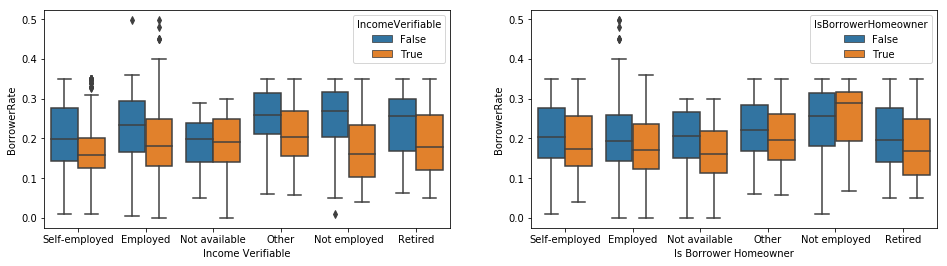

In [46]:
other_variables = ['IncomeVerifiable', 'IsBorrowerHomeowner']

plt.figure(figsize=(16, 4))

for i, v in enumerate(other_variables):
    plt.subplot(1, len(other_variables), i + 1)
    sb.boxplot(data=sel_df, x='EmploymentStatus', y='BorrowerRate', hue=v)
    plt.xlabel(var_name_to_label(v))

In all levels of employment status, those with verifiable income had relatively lower interest rates. All who owned homes (except the unemployed home owners) had lower interest rates relative to their counterparts.

Looking at income range:

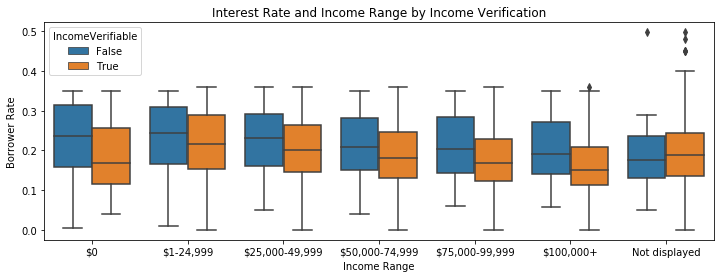

In [47]:
plt.figure(figsize=figsize_sm)
sb.boxplot(data=sel_df, x='IncomeRange', y='BorrowerRate', hue='IncomeVerifiable', order=income_order)
plt.ylabel('Borrower Rate')
plt.xlabel('Income Range');
plt.title('Interest Rate and Income Range by Income Verification');

Initially, the interest was higher for zero (\\$0) earners. However, if the income state is verified, the interest rate for zero earners is among the lowest interest rates.

Lastly, how does income verification modify the relationship between risk and interest rate?

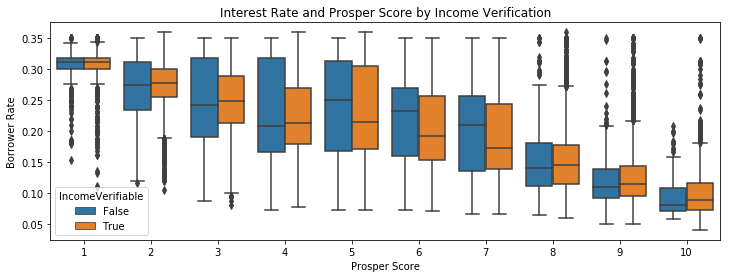

In [48]:
plt.figure(figsize=figsize_sm)
sb.boxplot(data=sel_df, x='ProsperScore', y='BorrowerRate', hue='IncomeVerifiable', order=list(range(1,11)))
plt.ylabel('Borrower Rate')
plt.xlabel('Prosper Score');
plt.title('Interest Rate and Prosper Score by Income Verification');

At the highest risk (prosper score between 1 - 4) income verification didn't appear to matter. Between prosper score 5 and 7, borrowers with verified income had relatively lower rates. Between 8 and 10, there were slight disparities in interest rates (like between 2 and 4).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I saw that increasing loan term was appeared to be associated more decrease in interest rates as loan amount increases. Long-term loans are more favorable to borrowers who borrow large amounts. 

Also, it seemed interest was higher for zero (\\$0) to low-income earners (\\$1 - \\$25k). However, if the income is verified, the interest rate for Borrowers who don't earn is among the lowest interest rates.

### Were there any interesting or surprising interactions between features?

Unemployed home owners had higher interest rates than other levels of employment. When the risk was neither too high nor too low, indicated by prosper score 5 - 7, interest rates were lower for verified income earners. For very low or very high risk loans, income verification did not seem to matter.

## Conclusions

In conclusion, interest rates appeared to be influenced by term, loan amount, employment status, income range, verification of income, risk and home ownership.

Specifically, Borrower interest rate was lowest for short term loans (12 months) while Borrower annual percentage rates (APR) was highest for short term loans and equal for mid-term and long-term loans.

Larger amount borrowed was associated lower interest rates especially for those who took mid-term and long-term loans.

Home owners (excluding unemployed ones) and verified income earners had lower interest rates. Verified-income earners also had lesser loan risk or higher prosper score.

Unemployed borrowers (including unemployed home owners) had higher interest rates. Similarly zero earners (unless verified) and low earners had relatively higher interest rates. 